
Installing Libraries

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# We create PCA for Review Data and reduce dimensions-Training Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler#Not needed as there is not much difference in TF-IDF
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
 
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas
import math



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import numpy as np
import json
import gzip
import pandas as pdn
from urllib.request import urlopen
import keras
import rpy2
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from collections import defaultdict

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Wisconsin_Project/superstore_dataset2011-2015.csv.zip"

Archive:  /content/drive/My Drive/Wisconsin_Project/superstore_dataset2011-2015.csv.zip
  inflating: superstore_dataset2011-2015.csv  


In [ ]:
!unzip "/content/drive/My Drive/Wisconsin_Project/Combined_News_DJIA.csv.zip"

Archive:  /content/drive/My Drive/Wisconsin_Project/Combined_News_DJIA.csv.zip
  inflating: Combined_News_DJIA.csv  


In [ ]:
import pandas as pd
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding= 'unicode_escape')
external_news=pd.read_csv('Combined_News_DJIA.csv')

In [ ]:
data.iloc[0:20067,2]=pd.to_datetime(data.iloc[0:20067,2], format='%m/%d/%Y')#Y REPRESRENTS YEAR WITH CENTURY

In [ ]:
data.iloc[20068:,2]=pd.to_datetime(data.iloc[20068:,2], format='%d-%m-%Y')#Y

In [ ]:
data['year'] = pd.to_datetime(data['Order Date']).dt.year

In [ ]:
def function(df):
  df['year']= pd.to_datetime(df['Order Date']).dt.year
  df['month']= pd.to_datetime(df['Order Date']).dt.month
  df['day']= pd.to_datetime(df['Order Date']).dt.day
  return df

In [ ]:
data_features=function(data)

In [ ]:
data_features.shape

(51290, 27)

In [ ]:
#Creating a String and coverting into data time object and then extracting date 
validation_date = pd.to_datetime('2014-06-25')
data['Order Date']=pd.to_datetime(data['Order Date'])
validation_data = data.loc[data['Order Date']> validation_date]

In [ ]:
start_date='2011-01-01'
end_training_date='2014-06-25'
end_date='2014-12-31'
start=pd.to_datetime(start_date)
end_tr=pd.to_datetime(end_training_date)
end_d=pd.to_datetime(end_date)
external_news_project=external_news[(external_news['Date']>start_date) &(external_news['Date']< end_training_date)]

In [ ]:
external_news_project.head(2)
external_news_project.drop(["Label"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
external_news_project.shape

(874, 26)

The above represents  the news text items 

External News Data

In [ ]:
external_news_project_valid=external_news[external_news['Date']>end_training_date ]
external_news_project_valid2=external_news_project_valid.drop(["Label"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
external_news_validation=external_news[(external_news['Date']>end_training_date) & (external_news['Date'] <=end_date) ]

In [ ]:
external_news_validation.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1480,2014-06-26,0,"U.S. Scientist Offers $10,000 to Anyone Who Ca...",Iran Tries To Save Asiatic Cheetah From Extinc...,Fake engineer made Berlin Airport fire system:...,Explosion rips through mall in Nigerian capita...,Conservative Canadian Government surprises whe...,North Korean restaurants springing up around A...,The polio virus has been detected in sewage in...,Iraq confirms and welcomes Syrian air strikes ...,...,Russia offered Baltics cheaper gas in exchange...,Kerry demands Russia action on Ukraine 'in hou...,"In a U.S. Court, Iraqis Accuse Blackwater of K...",World Health Organisation urges 'drastic actio...,Iraqi jihadists seize ancient Exorcist temple ...,Astronomers Detect Mysterious Signal 240 Milli...,"For first time, Israel compensating Palestinia...",Hamas arrests terror cell responsible for rock...,Chinese government funds have been misused to ...,Tackling climate change would grow global econ...


In [ ]:
external_news_validation2=external_news_validation.drop(["Label"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
external_news_project_test=external_news[(external_news['Date']>='2015-01-01') &(external_news['Date']<= '2015-04-01')]
#external_news_project_test=external_news_project_test.drop(["Label"], axis = 1, inplace = True)

In [ ]:
external_news_project['combined']=external_news_project[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13']].agg(lambda x: ','.join(x.values), axis=1).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
top_headings=['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13']

In [ ]:
external_news_project.head(4)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined
605,2011-01-03,Wikileaks releases cable of the July 1990 meet...,"""The WikiLeaks saga has a message . . . Your d...",7.1 magnitude earthquake hits Chile.,Lack of Jobs in Southern Europe Frustrates the...,The Village Where the Neo-Nazis Rule. Hitler ...,Settlers set fire to home as seven Palestinian...,Actor Pete Postlethwaite dies :(,"WikiLeaks: Israel Plans Total War on Lebanon, ...",Leaks reveal USA and Germany are collaborating...,...,N Korea to spend 100 million on new offices &a...,'The English language has almost doubled in si...,China boasts breakthrough in nuclear technology,Investigation closes in on German weapons comp...,Ugandan high court rules Rolling Stone newspap...,Japan Pushes Away Skilled Immigrants Despite A...,"Anticipating a WikiLeaks disclosure, Bank of A...",Greece decides to construct a fence along its ...,Israel extends a six-month ban on the immigrat...,Wikileaks releases cable of the July 1990 meet...
606,2011-01-04,Punjab(Pakistan) governor Salman Taseer assass...,Some Christians have predicted the end of days...,"If Youre Homeless In Japan, Here Are Your Options",And so it starts...Sri Lanka considers banning...,Saudi Arabia announces that all online publish...,A 15-year-old girl is more likely to die in ch...,As Hungary takes over the rotating presidency ...,WikiLeaks: Drug Enforcement Agency Goes \nGlob...,A huge Dragon tower to be built on border betw...,...,Volunteer Cyber Army Emerges in Estonia.,Cartels carve bloody swath through Central Ame...,Greece plans to build a 12.5km fence at border...,Argentina's 'impressive' bank heist - Al Jaze...,Iran invites nations to nuclear plants: \nIran...,Japan to Propose Closer Military Ties With S. ...,"Crocodiles, snakes are danger in flooded Austr...",U.S. agents are armed with insider information...,Mountain Revolt - Bavarian Farmers Threaten Bi...,Punjab(Pakistan) governor Salman Taseer assass...
607,2011-01-05,Cable from the U.S. Embassy in Tel Aviv says I...,"Over 3,000 birds fall dead in AR, over 500 in ...",Assange: WikiLeaks does not have concerns for ...,Greek professor of linguistics at Cambridge Un...,"President Ahmedinejad ""had harsh words for the...",WikiLeaks: Chinese attacks on Google came from...,"""France is the country that conducts the most ...","Chinese adult children must, by law, visit par...",40% of French and Germans believe the presence...,...,Romania's witches forced to pay income tax - a...,Police in the UK have banned ITN from a press ...,"""The Pentagon underestimated the speed at whic...",Mexico overtakes US in percentage of populatio...,BBC News - Palestinians look for int'l support...,"""In what appears to be the first diplomatic ca...",Uganda court bans media outing people as Gay f...,Mongolia is experiencing a huge resource-based...,France top culprit in industrial espionage - F...,Cable from the U.S. Embassy in Tel Aviv says I...
608,2011-01-06,Italy becomes the first country to ban plastic...,Five Myths About the Chinese Communist Party,The little red book that swept France: The la...,Furore over 'censored' edition of Huckleberry ...,"Together, Slim, Gates, Buffett, and Ambani con...",China hiding military build-up: WikiLeaks,Population 7 Billion - By 2045 global populati...,Israelis bribed to admit U.S. goods to Gaza: W...,The slow death of tolerance in Egypt | guardia...,...,Increased numbers of policemen are being deplo...,Anonymous joins Tunisian activists to call for...,Ivory Coast: Gbagbo 'expels UK and Canada envoys',UK students to launch new wave of protests,Food Price Surge Puts Strain On India's Poor\n,WikiLeaks XXVIII: Organized Crime Squeezing th...,Pakistan's government nears collapse again,Saudi Arabia 'detains' Israeli vulture for spying,"""Taseer died for the Christians and now we are...",Italy becomes the first country to ban plastic...


In [ ]:
external_news_validation['combined']=external_news_validation[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13']].agg(lambda x: ','.join(x.values), axis=1).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
external_news_project_test['Combined']=external_news_project_test[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13']].agg(lambda x: ','.join(x.values), axis=1).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
external_news_project_test['Combined']

1611    Most cases of cancer are the result of sheer b...
1612    Moscow-&gt;Beijing high speed train will reduc...
1613    US oil falls below $50 a barrel,Toyota gives a...
1614    'Shots fired' at French magazine HQ,90% of Bib...
1615    New Charlie Hebdo issue to come out next week:...
                              ...                        
1668    Germanwings Pilot Was Locked Out of Cockpit Be...
1669    WikiLeaks Reveals TPP Proposal Allowing Corpor...
1670    The president and CEO of The Associated Press ...
1671    Facebook 'tracks all visitors, breaching EU la...
1672    Indian Army team heads for Mt.Everest to bring...
Name: Combined, Length: 62, dtype: object

In [ ]:
external_news_validation['combined']

1480    U.S. Scientist Offers $10,000 to Anyone Who Ca...
1481    German government cancels Verizon contract in ...
1482    Blackwaters top manager issued a threat: that ...
1483    Ukraine president ends ceasefire - 'We will at...
1484    Facebook Is Under Investigation For Mood Manip...
                              ...                        
1606    Death toll among Qatars 2022 World Cup workers...
1607    Saudis are eagerly awaiting the approval of a ...
1608    Solar Power Storage Prices Drop 25% In Germany...
1609    China businessman jailed for 13 years for buyi...
1610    AirAsia flight found at the bottom of the Java...
Name: combined, Length: 131, dtype: object

In [ ]:
!pip install texthero


     |████████████████████████████████| 1.5 MB 3.2 MB/s 
     |████████████████████████████████| 235 kB 5.9 MB/s 
     |████████████████████████████████| 749 kB 6.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
#Now we need to improve the data Quality by pre processing it by improving the corpus. 
#Towards this the text hero pipe line was easy to implement 

def cleantext(textcolumn):
 import texthero as hero
 from texthero import preprocessing
 import re
 X=textcolumn
 custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_brackets,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_digits]
 Xm= hero.clean(X, custom_pipeline)
 Xm= [n.replace('{','') for n in Xm]
 Xm= [n.replace('}','') for n in Xm]
 Xm =[n.replace('(','') for n in Xm]
 Xm= [n.replace(')','') for n in Xm]
 Xm=[re.sub(r"[A-Za-z]+\d+|\d+[A-Za-z]+",'',i).strip() for i in Xm]#removing words with numberslike 100mg,16yrs etc
 return Xm

In [ ]:
#corpus=external_news['combined']

In [ ]:
train_external_news=cleantext(external_news_project.combined)
valid_external_news=cleantext(external_news_validation.combined)
test_external_news=cleantext(external_news_project_test['Combined'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TFIDF  VECTOR

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def TFIDF_text(cleanedcorpusdf):
    countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
    # convert the reviews  into a matrix
    count_wm = countvectorizer.fit_transform(cleanedcorpusdf)# this creates a list of review number and frequency of index of words in that particular 
    tfidf_wm = tfidfvectorizer.fit_transform(cleanedcorpusdf)# this creates a  matrix of TFIDF 
    print(count_wm.toarray())
    #retrieve the terms found in the corpora
    # if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
    #count_tokens = tfidfvectorizer.get_feature_names() # no difference
    count_tokens = countvectorizer.get_feature_names()# Feaures/ Words names
    tfidf_tokens = tfidfvectorizer.get_feature_names()
    df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
  
    return df_tfidfvect,df_countvect

In [ ]:
tf_idf_train=TFIDF_text(train_external_news)[0]
tf_idf_valid=TFIDF_text(valid_external_news)[0]
tf_idf_test=TFIDF_text(test_external_news)[0]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_idf_train.shape

(874, 17016)

In [ ]:
validation_date = pd.to_datetime('2014-06-25').date()
data['Order Date']=pd.to_datetime(data['Order Date'])

In [ ]:
validation_data=data[data['Order Date']> '2014-06-25']

In [ ]:

training_data = data.drop(labels=validation_data.index, axis=0)
consumer_vector=['Region',"Market","Country","Category",'Order Date']

In [ ]:
training_data['Order Date']=pd.to_datetime(training_data['Order Date'])

In [ ]:
training_data2=training_data.groupby(consumer_vector)['Sales'].sum().reset_index()

In [ ]:
training_data2['Order Date'].dtype

dtype('<M8[ns]')

In [ ]:
training_data_cohort=training_data2.set_index('Order Date')

In [ ]:
Consumer_Vector=['Region','Market','Country','Category']

In [ ]:
#Let us first take a sample data:'West',US,Tech

In [ ]:
training_data_cohort=training_data2[(training_data2['Category']=='Technology') & (training_data2['Country']=='United States')]

In [ ]:
training_data_cohort.shape

(1052, 6)

In [ ]:
training_data_cohort2=training_data_cohort.set_index('Order Date')

In [ ]:
training_data_cohort2

,Region,Market,Country,Category,Sales
Order Date,,,,,
2011-02-02,Central,US,United States,Technology,468.900
2011-02-08,Central,US,United States,Technology,21.200
2011-02-09,Central,US,United States,Technology,1275.630
2011-02-11,Central,US,United States,Technology,88.776
2011-02-21,Central,US,United States,Technology,62.310
...,...,...,...,...,...
2014-06-10,West,US,United States,Technology,71.816
2014-06-11,West,US,United States,Technology,159.990
2014-06-12,West,US,United States,Technology,31.176


In [ ]:
del training_data_cohort2['Region']
del training_data_cohort2['Country']
del training_data_cohort2['Category']

In [ ]:
del training_data_cohort2['Market']

In [ ]:
training_data_cohort3=training_data_cohort2.resample('D').sum()

In [ ]:
training_data_cohort3

,Sales
Order Date,
2011-01-03,5.940
2011-01-04,0.000
2011-01-05,0.000
2011-01-06,881.930
2011-01-07,575.920
...,...
2014-06-17,737.922
2014-06-18,3505.840
2014-06-19,0.000


In [ ]:
training_data_cohort3[training_data_cohort3['Sales']==0].count()

Sales    571
dtype: int64

In [ ]:
training_data_cohort_all_products_us=training_data2[(training_data2['Country']=='United States')]

In [ ]:
training_data_us_all=training_data_cohort_all_products_us.set_index('Order Date')
del training_data_us_all['Market']
del training_data_us_all['Country']
del training_data_us_all['Region']
del training_data_us_all['Category']

## Daily Sales of All Products in United States 

In [ ]:
training_data_us_all

,Sales
Order Date,
2011-01-03,1436.427
2011-01-06,2001.860
2011-01-12,3481.898
2011-01-21,287.670
2011-01-27,141.960
...,...
2014-06-10,71.816
2014-06-11,159.990
2014-06-12,31.176


In [ ]:
#Training _Data

In [ ]:
training_data_us_all=training_data_us_all.resample('D').sum()

In [ ]:
training_data_us_all.reset_index(inplace=True)

In [ ]:
training_data_us_all

,Sales
Order Date,
2011-01-02,290.666
2011-01-03,2203.151
2011-01-04,119.888
2011-01-05,0.000
2011-01-06,5188.520
...,...
2014-06-21,1028.228
2014-06-22,595.656
2014-06-23,579.019


In [ ]:
external_news_project2=external_news_project.rename(columns={'Date': 'Order Date'})

In [ ]:
external_news_project2['Order Date']= pd.to_datetime(external_news_project2['Order Date'])

EXTERNAL NEWS DATA WITH TOTAL US DAILY SALES

In [ ]:
external_news_project2.head(2)

# Data Set for US Market for all kind of Total Sales with External News Parameter 

,Order Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined
605,2011-01-03,Wikileaks releases cable of the July 1990 meet...,"""The WikiLeaks saga has a message . . . Your d...",7.1 magnitude earthquake hits Chile.,Lack of Jobs in Southern Europe Frustrates the...,The Village Where the Neo-Nazis Rule. Hitler ...,Settlers set fire to home as seven Palestinian...,Actor Pete Postlethwaite dies :(,"WikiLeaks: Israel Plans Total War on Lebanon, ...",Leaks reveal USA and Germany are collaborating...,...,N Korea to spend 100 million on new offices &a...,'The English language has almost doubled in si...,China boasts breakthrough in nuclear technology,Investigation closes in on German weapons comp...,Ugandan high court rules Rolling Stone newspap...,Japan Pushes Away Skilled Immigrants Despite A...,"Anticipating a WikiLeaks disclosure, Bank of A...",Greece decides to construct a fence along its ...,Israel extends a six-month ban on the immigrat...,Wikileaks releases cable of the July 1990 meet...
606,2011-01-04,Punjab(Pakistan) governor Salman Taseer assass...,Some Christians have predicted the end of days...,"If Youre Homeless In Japan, Here Are Your Options",And so it starts...Sri Lanka considers banning...,Saudi Arabia announces that all online publish...,A 15-year-old girl is more likely to die in ch...,As Hungary takes over the rotating presidency ...,WikiLeaks: Drug Enforcement Agency Goes \nGlob...,A huge Dragon tower to be built on border betw...,...,Volunteer Cyber Army Emerges in Estonia.,Cartels carve bloody swath through Central Ame...,Greece plans to build a 12.5km fence at border...,Argentina's 'impressive' bank heist - Al Jaze...,Iran invites nations to nuclear plants: \nIran...,Japan to Propose Closer Military Ties With S. ...,"Crocodiles, snakes are danger in flooded Austr...",U.S. agents are armed with insider information...,Mountain Revolt - Bavarian Farmers Threaten Bi...,Punjab(Pakistan) governor Salman Taseer assass...


Combine News Data with Daily Total Sales of United States online Sales through inner merege with sales data 

In [ ]:
training_data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,day
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011,1,1


Merging News Data with Total Daily Sales of United States for All products

In [ ]:
train_news_sales=external_news_project2.merge(training_data_us_all,on='Order Date',how='inner')

In [ ]:
train_news_sales.head(3)
train_news_sales.columns

Index(['Order Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined', 'Sales'],
      dtype='object')

In [ ]:
train_news_sales.head(2)

,Order Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined,Sales
0,2011-01-03,Wikileaks releases cable of the July 1990 meet...,"""The WikiLeaks saga has a message . . . Your d...",7.1 magnitude earthquake hits Chile.,Lack of Jobs in Southern Europe Frustrates the...,The Village Where the Neo-Nazis Rule. Hitler ...,Settlers set fire to home as seven Palestinian...,Actor Pete Postlethwaite dies :(,"WikiLeaks: Israel Plans Total War on Lebanon, ...",Leaks reveal USA and Germany are collaborating...,...,'The English language has almost doubled in si...,China boasts breakthrough in nuclear technology,Investigation closes in on German weapons comp...,Ugandan high court rules Rolling Stone newspap...,Japan Pushes Away Skilled Immigrants Despite A...,"Anticipating a WikiLeaks disclosure, Bank of A...",Greece decides to construct a fence along its ...,Israel extends a six-month ban on the immigrat...,Wikileaks releases cable of the July 1990 meet...,2203.151
1,2011-01-04,Punjab(Pakistan) governor Salman Taseer assass...,Some Christians have predicted the end of days...,"If Youre Homeless In Japan, Here Are Your Options",And so it starts...Sri Lanka considers banning...,Saudi Arabia announces that all online publish...,A 15-year-old girl is more likely to die in ch...,As Hungary takes over the rotating presidency ...,WikiLeaks: Drug Enforcement Agency Goes \nGlob...,A huge Dragon tower to be built on border betw...,...,Cartels carve bloody swath through Central Ame...,Greece plans to build a 12.5km fence at border...,Argentina's 'impressive' bank heist - Al Jaze...,Iran invites nations to nuclear plants: \nIran...,Japan to Propose Closer Military Ties With S. ...,"Crocodiles, snakes are danger in flooded Austr...",U.S. agents are armed with insider information...,Mountain Revolt - Bavarian Farmers Threaten Bi...,Punjab(Pakistan) governor Salman Taseer assass...,119.888


In [ ]:
news_train_daily=train_news_sales[top_headings].agg(lambda x: ','.join(x.values), axis=1).T

In [ ]:
news_clean_train=cleantext(news_train_daily)
tfidf_news_train=TFIDF_text(news_clean_train)[0]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CREATING ORDER DATE ITEMS TO LIST WHICH CAN BE USES AS A COLUMN TO BE ADDED AS A DATAFRAME

In [ ]:
r=train_news_sales['Order Date'].tolist()

In [ ]:
tfidf_news_train

,2011,aaa,aadmi,aali,aam,aamer,aap,aaron,abadan,abandon,...,zoologists,zooming,zoos,zte,zu,zuckberg,zuckerberg,zulu,zuma,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0.00504164 0.00444725 0.00423911]


array([0.00504171, 0.00948993, 0.01373292, 0.01725867, 0.02041726,
       0.02344022, 0.02636363, 0.0292333 , 0.03200791, 0.03465899,
       0.03725323, 0.03978808, 0.04229713, 0.04477882, 0.04721412,
       0.04963954, 0.05202135, 0.05438653, 0.0567235 , 0.05903246,
       0.06134048, 0.0636284 , 0.06590972, 0.06817094, 0.07042766,
       0.07264188, 0.07484307, 0.07704032, 0.07923463, 0.0814077 ,
       0.08357019, 0.08571887, 0.08785142, 0.08997549, 0.09209052,
       0.09418965, 0.09627986, 0.09836343, 0.10043696, 0.10249249,
       0.10454611, 0.10659152, 0.10862605, 0.11065413, 0.11266894,
       0.11467433, 0.1166744 , 0.11866388, 0.12064252, 0.12261539,
       0.124586  , 0.12654954, 0.12850672, 0.13045461, 0.13239797,
       0.13433821, 0.13627639, 0.13820001, 0.14012256, 0.14203502,
       0.14394492, 0.14584882, 0.14774632, 0.14964061, 0.15153068,
       0.15341605, 0.15529363, 0.15716391, 0.15903069, 0.16089193,
       0.1627522 , 0.16460441, 0.16644893, 0.16829256, 0.17012

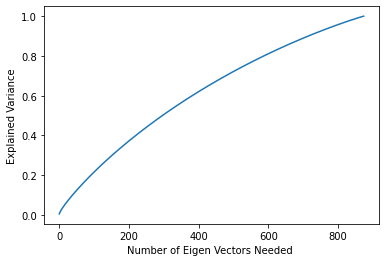

In [ ]:
# We create PCA for Head Line News Data and reduce dimensions-Training Data
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
p=tfidf_news_train#Train_data
l=pca.fit(p)
print(l.explained_variance_ratio_)
PC=pca.fit_transform(p)
principalDf = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2','PC=3'])
principalDf
#Very low variance  and hence may not be accurate.
pca=PCA()
pca.fit(p)
cumsum=np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.xlabel("Number of Eigen Vectors Needed ")
plt.ylabel("Explained Variance")
cumsum

In [ ]:
#DF_Train_TFIDF=pd.concat([tfidf_news_train,train_news_sales['Sales']],axis=1)#Final  Data Frame with TFIDF

In [ ]:
#DF_Train_TFIDF.shape

In [ ]:
# We create PCA for Head Line News Data and reduce dimensions-Training Data
# import matplotlib.pyplot as plt
# pca = PCA(n_components=20)
# p=tfidf_news_train#Train_data nes only 
# l=pca.fit(p)
# print(l.explained_variance_ratio_)
# PC=pca.fit_transform(p)
# principalDf = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2','PC=3'])
# principalDf
# #Very low variance  and hence may not be accurate.
# pca=PCA()
# pca.fit(p)
# cumsum=np.cumsum(pca.explained_variance_ratio_)

# plt.plot(cumsum)
# plt.xlabel("Number of Eigen Vectors Needed ")
# plt.ylabel("Explained Variance")


In [ ]:
%timeit
pca = PCA(n_components=500)
p=tfidf_news_train#Train_data
l=pca.fit(p)
print(l.explained_variance_ratio_)
PC=pca.fit_transform(p)
principalDf = pd.DataFrame(data = PC)

[0.00504171 0.00444821 0.00424299 0.00352573 0.00315856 0.00302291
 0.00292333 0.0028696  0.0027745  0.00265093 0.002594   0.00253464
 0.00250888 0.00248148 0.00243505 0.00242515 0.00238142 0.00236482
 0.00233661 0.00230861 0.00230739 0.00228746 0.00228096 0.00226068
 0.00225627 0.00221371 0.00220053 0.00219655 0.00219356 0.00217243
 0.00216199 0.0021481  0.00213191 0.00212319 0.00211419 0.00209847
 0.00208945 0.00208292 0.00207274 0.00205452 0.00205272 0.00204453
 0.00203348 0.00202701 0.00201379 0.00200451 0.0019984  0.00198846
 0.0019776  0.00197154 0.0019696  0.00196236 0.00195563 0.00194672
 0.00194212 0.00193899 0.0019369  0.00192205 0.00192137 0.00191117
 0.00190832 0.00190209 0.00189537 0.00189293 0.00188838 0.00188358
 0.00187589 0.00186846 0.00186488 0.00185896 0.00185835 0.0018508
 0.00184248 0.0018417  0.00183453 0.00183052 0.00182361 0.00181859
 0.00180926 0.00180854 0.00180328 0.00180075 0.00179519 0.00178733
 0.00178557 0.00178467 0.00177967 0.00177453 0.00177312 0.00176

In [ ]:
principalDf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.023132,-0.028762,0.011585,-0.027047,0.026497,-0.034244,-0.043691,0.039762,0.065638,-0.016029,...,-0.054773,-0.031351,0.019977,-0.001733,-0.065873,-0.029079,0.034555,0.013068,-0.015111,0.016282
1,-0.049190,-0.002358,-0.026899,-0.058658,0.051750,-0.021060,0.016015,-0.003225,0.001377,0.026827,...,0.025843,0.040784,-0.040643,-0.043008,0.012582,0.031639,-0.018925,-0.026639,0.020011,-0.021485
2,0.009816,-0.004730,-0.006522,-0.051375,0.018337,-0.063525,0.007574,0.077253,0.058679,0.010003,...,-0.017925,-0.038459,0.038684,0.019747,0.003048,-0.014500,-0.018696,0.026764,0.071809,0.024084


In [ ]:
DF_Train_TFIDF_sales=pd.concat([principalDf,train_news_sales['Sales']],axis=1)

In [ ]:
DF_Train_TFIDF_sales.head(2)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Sales
0,-0.023132,-0.028762,0.011585,-0.027047,0.026497,-0.034244,-0.043691,0.039762,0.065638,-0.016029,...,-0.031351,0.019977,-0.001733,-0.065873,-0.029079,0.034555,0.013068,-0.015111,0.016282,2203.151
1,-0.049190,-0.002358,-0.026899,-0.058658,0.051750,-0.021060,0.016015,-0.003225,0.001377,0.026827,...,0.040784,-0.040643,-0.043008,0.012582,0.031639,-0.018925,-0.026639,0.020011,-0.021485,119.888


In [ ]:
train_news_sales.head(1)

,Order Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined,Sales
0,2011-01-03,Wikileaks releases cable of the July 1990 meet...,"""The WikiLeaks saga has a message . . . Your d...",7.1 magnitude earthquake hits Chile.,Lack of Jobs in Southern Europe Frustrates the...,The Village Where the Neo-Nazis Rule. Hitler ...,Settlers set fire to home as seven Palestinian...,Actor Pete Postlethwaite dies :(,"WikiLeaks: Israel Plans Total War on Lebanon, ...",Leaks reveal USA and Germany are collaborating...,...,'The English language has almost doubled in si...,China boasts breakthrough in nuclear technology,Investigation closes in on German weapons comp...,Ugandan high court rules Rolling Stone newspap...,Japan Pushes Away Skilled Immigrants Despite A...,"Anticipating a WikiLeaks disclosure, Bank of A...",Greece decides to construct a fence along its ...,Israel extends a six-month ban on the immigrat...,Wikileaks releases cable of the July 1990 meet...,2203.151


In [ ]:
train_news_sales.shape

(874, 28)

Adding Order Date 

In [ ]:
DF_Train_TFIDF_sales['Order Date']=r

Section I complete 

In [ ]:
DF_Train_TFIDF_sales.head(2)

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,Sales,Order Date
0,-0.023132,-0.028762,0.011585,-0.027047,0.026497,-0.034244,-0.043691,0.039762,0.065638,-0.016029,...,0.019977,-0.001733,-0.065873,-0.029079,0.034555,0.013068,-0.015111,0.016282,2203.151,2011-01-03
1,-0.049190,-0.002358,-0.026899,-0.058658,0.051750,-0.021060,0.016015,-0.003225,0.001377,0.026827,...,-0.040643,-0.043008,0.012582,0.031639,-0.018925,-0.026639,0.020011,-0.021485,119.888,2011-01-04


TRAINING DATA _TFIDF FRAMEWORK 

In [ ]:
Ready_X_TFIDF=function(DF_Train_TFIDF_sales)

In [ ]:
Ready_X_TFIDF.head(3)

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,Sales,Order Date,year,month,day
0,-0.023132,-0.028762,0.011585,-0.027047,0.026497,-0.034244,-0.043691,0.039762,0.065638,-0.016029,...,-0.029079,0.034555,0.013068,-0.015111,0.016282,2203.151,2011-01-03,2011,1,3
1,-0.049190,-0.002358,-0.026899,-0.058658,0.051750,-0.021060,0.016015,-0.003225,0.001377,0.026827,...,0.031639,-0.018925,-0.026639,0.020011,-0.021485,119.888,2011-01-04,2011,1,4
2,0.009816,-0.004730,-0.006522,-0.051375,0.018337,-0.063525,0.007574,0.077253,0.058679,0.010003,...,-0.014500,-0.018696,0.026764,0.071809,0.024084,0.000,2011-01-05,2011,1,5


In [ ]:
!pip install gensim
train_external_news# After Hero Processsing
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
documents=[TaggedDocument(p,[i]) for i ,p in enumerate(train_external_news)]
documents[1:10]# each document  is like a post

def parameter_tuning(v,count):
    #instantiate model
    model = Doc2Vec(vector_size=v, window=3,min_count=count , workers=4, epochs = 3)#build vocab
    model.build_vocab(documents)#train model
    model.train(documents, epochs=model.epochs,total_examples=model.corpus_count)
    return model

x=parameter_tuning(v=16,count=40)# Parametric tuning of #model with vector of 32, count 40
x2=parameter_tuning(v=8,count=30)
x3=parameter_tuning(v=32,count=20)


In [ ]:
def doc2vec(cleanedcorpus_train_ADHD):

  doc2vecnew = [x.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
              for i in range(0,len(cleanedcorpus_train_ADHD))]
  doc2vecnew2=[x2.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
              for i in range(0,len(cleanedcorpus_train_ADHD))]
  doc2vecnew3=[x3.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
              for i in range(0,len(cleanedcorpus_train_ADHD))]
  # Each document is vector in R 64 space

  X16_train=pd.DataFrame(doc2vecnew)
  X8_train=pd.DataFrame(doc2vecnew2)
  X32_train=pd.DataFrame(doc2vecnew3)

  return X16_train,X8_train,X32_train
  # Each document is vector in R 64 space


#Let us take US consumer all products daily sales to start with 

In [ ]:
text_us_allprod=cleantext(train_news_sales['combined'])

In [ ]:
p,q,t=doc2vec(text_us_allprod)

In [ ]:
p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.024341,0.000458,0.029291,0.017140,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630
1,0.001347,0.030260,0.029282,-0.009680,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516
2,-0.012788,0.028524,-0.027810,-0.019644,0.027527,0.031512,0.012627,0.013843,0.022641,0.015410,0.005302,0.024961,0.028408,0.008313,0.009836,0.002309
3,0.046160,0.020339,-0.020908,0.006244,0.046546,0.098293,-0.022360,0.026268,0.088348,-0.017892,0.027462,0.025848,0.085749,0.049202,-0.084346,0.023291
4,0.023307,0.020721,0.021790,-0.002730,0.008263,0.016840,0.026755,0.028741,-0.005513,-0.021394,-0.017349,-0.018205,0.026147,0.023113,-0.031176,-0.025327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,-0.024429,-0.005854,-0.012842,0.020389,-0.015220,0.025657,0.005185,0.012058,0.006772,-0.001642,-0.008234,-0.016268,-0.013312,-0.001013,-0.002353,0.000344
870,-0.020328,0.028686,-0.014412,-0.000513,0.018921,-0.007572,-0.003786,0.007544,0.027064,0.000326,0.013351,-0.003358,0.021285,-0.021975,-0.010934,0.027399
871,0.038623,0.041888,-0.038202,-0.005934,0.024092,0.024114,0.027704,0.007581,0.042782,-0.024463,0.029811,-0.006027,0.040468,0.026474,-0.060790,0.039730
872,0.004719,0.027057,-0.031197,-0.026607,0.021102,0.007087,0.003061,-0.009983,0.006910,0.027007,-0.029998,-0.006563,0.019500,0.030277,0.013054,-0.027464


In [ ]:
p.shape

(874, 16)

In [ ]:
p.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.024341,0.000458,0.029291,0.017140,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630
1,0.001347,0.030260,0.029282,-0.009680,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516
2,-0.012788,0.028524,-0.027810,-0.019644,0.027527,0.031512,0.012627,0.013843,0.022641,0.015410,0.005302,0.024961,0.028408,0.008313,0.009836,0.002309


In [ ]:
from datetime import datetime
def parse(row):
    x=row['Order Date']
    return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
data_features.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
data_features['Order Date']=pd.to_datetime(data_features['Order Date'],errors='coerce')

In [ ]:
data_features['Order Date'].dtype

dtype('<M8[ns]')

In [ ]:
DF_Doc2Vec_train_sales=pd.concat([p,train_news_sales['Sales']],axis=1)
DF_Doc2Vec_train_sales.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,-0.024341,0.000458,0.029291,0.01714,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630,2203.151
1,0.001347,0.030260,0.029282,-0.00968,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516,119.888


In [ ]:
train_news_sales['Order Date']=r

In [ ]:
r[0]

Timestamp('2011-01-03 00:00:00')

In [ ]:
DF_Doc2Vec_train_sales['Order Date']=r
DF_Doc2Vec_train_sales.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales,Order Date
0,-0.024341,0.000458,0.029291,0.01714,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630,2203.151,2011-01-03
1,0.001347,0.030260,0.029282,-0.00968,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516,119.888,2011-01-04


In [ ]:
DF_Doc2Vec_train_sales

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales,Order Date
0,-0.024341,0.000458,0.029291,0.017140,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630,2203.1510,2011-01-03
1,0.001347,0.030260,0.029282,-0.009680,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516,119.8880,2011-01-04
2,-0.012788,0.028524,-0.027810,-0.019644,0.027527,0.031512,0.012627,0.013843,0.022641,0.015410,0.005302,0.024961,0.028408,0.008313,0.009836,0.002309,0.0000,2011-01-05
3,0.046160,0.020339,-0.020908,0.006244,0.046546,0.098293,-0.022360,0.026268,0.088348,-0.017892,0.027462,0.025848,0.085749,0.049202,-0.084346,0.023291,5188.5200,2011-01-06
4,0.023307,0.020721,0.021790,-0.002730,0.008263,0.016840,0.026755,0.028741,-0.005513,-0.021394,-0.017349,-0.018205,0.026147,0.023113,-0.031176,-0.025327,601.0240,2011-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,-0.024429,-0.005854,-0.012842,0.020389,-0.015220,0.025657,0.005185,0.012058,0.006772,-0.001642,-0.008234,-0.016268,-0.013312,-0.001013,-0.002353,0.000344,3896.6720,2014-06-18
870,-0.020328,0.028686,-0.014412,-0.000513,0.018921,-0.007572,-0.003786,0.007544,0.027064,0.000326,0.013351,-0.003358,0.021285,-0.021975,-0.010934,0.027399,1031.1555,2014-06-19
871,0.038623,0.041888,-0.038202,-0.005934,0.024092,0.024114,0.027704,0.007581,0.042782,-0.024463,0.029811,-0.006027,0.040468,0.026474,-0.060790,0.039730,2115.9410,2014-06-20
872,0.004719,0.027057,-0.031197,-0.026607,0.021102,0.007087,0.003061,-0.009983,0.006910,0.027007,-0.029998,-0.006563,0.019500,0.030277,0.013054,-0.027464,579.0190,2014-06-23


In [ ]:
x_train_doc2vec=DF_Doc2Vec_train_sales.iloc[:,:-1]

In [ ]:
x_train_doc2vec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,-0.024341,0.000458,0.029291,0.017140,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630,2203.1510
1,0.001347,0.030260,0.029282,-0.009680,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516,119.8880
2,-0.012788,0.028524,-0.027810,-0.019644,0.027527,0.031512,0.012627,0.013843,0.022641,0.015410,0.005302,0.024961,0.028408,0.008313,0.009836,0.002309,0.0000
3,0.046160,0.020339,-0.020908,0.006244,0.046546,0.098293,-0.022360,0.026268,0.088348,-0.017892,0.027462,0.025848,0.085749,0.049202,-0.084346,0.023291,5188.5200
4,0.023307,0.020721,0.021790,-0.002730,0.008263,0.016840,0.026755,0.028741,-0.005513,-0.021394,-0.017349,-0.018205,0.026147,0.023113,-0.031176,-0.025327,601.0240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,-0.024429,-0.005854,-0.012842,0.020389,-0.015220,0.025657,0.005185,0.012058,0.006772,-0.001642,-0.008234,-0.016268,-0.013312,-0.001013,-0.002353,0.000344,3896.6720
870,-0.020328,0.028686,-0.014412,-0.000513,0.018921,-0.007572,-0.003786,0.007544,0.027064,0.000326,0.013351,-0.003358,0.021285,-0.021975,-0.010934,0.027399,1031.1555
871,0.038623,0.041888,-0.038202,-0.005934,0.024092,0.024114,0.027704,0.007581,0.042782,-0.024463,0.029811,-0.006027,0.040468,0.026474,-0.060790,0.039730,2115.9410
872,0.004719,0.027057,-0.031197,-0.026607,0.021102,0.007087,0.003061,-0.009983,0.006910,0.027007,-0.029998,-0.006563,0.019500,0.030277,0.013054,-0.027464,579.0190


SECTON  2 FINISHES OF PREPARING doc2 Vector for Training Data Set 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = x_train_doc2vec.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
values.shape

(874, 17)

In [ ]:
values[:,-1]

array([2.2031510e+03, 1.1988800e+02, 0.0000000e+00, 5.1885200e+03,
       6.0102400e+02, 4.7100000e+00, 4.7320800e+03, 5.6243900e+03,
       0.0000000e+00, 3.5537950e+03, 0.0000000e+00, 6.4864000e+01,
       3.7859400e+02, 2.6738700e+03, 4.6020000e+01, 0.0000000e+00,
       0.0000000e+00, 1.0972500e+03, 4.2667000e+02, 2.4050000e+02,
       0.0000000e+00, 4.6890000e+02, 2.0238400e+02, 1.4585580e+03,
       7.9560000e+01, 8.8628000e+02, 3.2541500e+03, 5.9814400e+02,
       2.1263700e+03, 0.0000000e+00, 5.7672600e+02, 2.1360000e+01,
       9.0400000e+00, 5.4208000e+01, 8.8500000e+00, 1.9440000e+01,
       1.1364000e+01, 5.5672000e+01, 1.9456000e+01, 0.0000000e+00,
       2.1164600e+02, 1.3458920e+03, 2.3345000e+02, 0.0000000e+00,
       4.7799400e+02, 2.2080000e+01, 8.6268300e+02, 2.7841630e+03,
       2.1085500e+03, 3.7078200e+02, 4.7192000e+02, 3.9603580e+03,
       2.8106716e+04, 4.1098160e+03, 4.6409300e+02, 9.4506400e+02,
       6.5380000e+01, 4.5914600e+02, 1.8238040e+03, 8.9084100e

In [ ]:
scaler2=MinMaxScaler(feature_range=(0,1))
values2=values[:,-1].reshape(-1,1)
scaled2=scaler2.fit_transform(values2)

In [ ]:
scaled.shape

(874, 17)

In [ ]:
len(scaled[0:-3,1])

871

In [ ]:
import numpy as np
SEQ_LEN = 4
DATA_LEN = scaled.shape[0]

X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,17)#preparing training data from 0:-6

for i in range(1,SEQ_LEN):
    X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,17), axis=1)
    
Y_train = scaled[SEQ_LEN:-1,-1]# SEQUENCE OF TRAINED VALUES FROM

In [ ]:
X_train.shape

(869, 4, 17)

In [ ]:
Y_train.shape

(869,)

In [ ]:
X_train.shape

(869, 4, 17)

In [ ]:
X_train[1,0,0]

0.2378549713563315

In [ ]:
#Lets chec if sequence is right or not
print(X_train[40,:,:17])# A SEQUENCE OF 40 ROW SHOULD HAVE ALL 5 POINTS 40-45
print(Y_train[40])
print(scaled[40:46,0])

[[0.26373641 0.43435967 0.66555879 0.63667968 0.33719624 0.0710506
  0.60390963 0.05930059 0.0808841  0.68908118 0.17250621 0.28174283
  0.25525936 0.15931665 0.75801327 0.14353107 0.00753009]
 [0.0615997  0.2454285  0.76215645 0.53136062 0.53869318 0.22534327
  0.39968923 0.35286944 0.18747113 0.4857868  0.08067802 0.34484592
  0.04608589 0.32150565 0.8524199  0.32467424 0.04788507]
 [0.29312938 0.38422627 0.78174548 0.06768063 0.47647984 0.14715629
  0.69523853 0.5659632  0.06526819 0.24758881 0.21330993 0.51954549
  0.02522123 0.41537503 0.79469731 0.05997214 0.00830584]
 [0.016608   0.22750482 0.85474119 0.46192216 0.28033616 0.09178523
  0.35209144 0.21027999 0.15116155 0.3350958  0.48355536 0.34117759
  0.26912566 0.04258915 0.81952845 0.22887015 0.        ]]
0.0170063980437985
[0.26373641 0.0615997  0.29312938 0.016608   0.1020476  0.07284773]


In [ ]:
Y_train

array([2.13836437e-02, 1.67575607e-04, 1.68361185e-01, 2.00108401e-01,
       0.00000000e+00, 1.26439353e-01, 0.00000000e+00, 2.30777584e-03,
       1.34698767e-02, 9.51327789e-02, 1.63733109e-03, 0.00000000e+00,
       0.00000000e+00, 3.90387123e-02, 1.51803576e-02, 8.55667379e-03,
       0.00000000e+00, 1.66828455e-02, 7.20055662e-03, 5.18935759e-02,
       2.83064019e-03, 3.15326771e-02, 1.15778378e-01, 2.12811771e-02,
       7.56534488e-02, 0.00000000e+00, 2.05191528e-02, 7.59960715e-04,
       3.21631314e-04, 1.92864937e-03, 3.14871364e-04, 6.91649640e-04,
       4.04316178e-04, 1.98073656e-03, 6.92218899e-04, 0.00000000e+00,
       7.53008640e-03, 4.78850678e-02, 8.30584406e-03, 0.00000000e+00,
       1.70063980e-02, 7.85577369e-04, 3.06931269e-02, 9.90568589e-02,
       7.50194366e-02, 1.31919360e-02, 1.67902931e-02, 1.40904330e-01,
       1.00000000e+00, 1.46221850e-01, 1.65118187e-02, 3.36241345e-02,
       2.32613444e-03, 1.63358110e-02, 6.48885483e-02, 3.16949515e-02,
      

In [ ]:
from tensorflow.keras import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                13600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 13,651
Trainable params: 13,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train.shape

(869, 4, 17)

Train on 782 samples, validate on 87 samples
Epoch 1/100
640/782 [=======================>......] - ETA: 0s - loss: 0.0094 - mean_absolute_error: 0.0679

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


782/782 [==============================] - 1s 1ms/sample - loss: 0.0090 - mean_absolute_error: 0.0670 - val_loss: 0.0078 - val_mean_absolute_error: 0.0573
Epoch 2/100
782/782 [==============================] - 0s 175us/sample - loss: 0.0075 - mean_absolute_error: 0.0660 - val_loss: 0.0081 - val_mean_absolute_error: 0.0537
Epoch 3/100
782/782 [==============================] - 0s 118us/sample - loss: 0.0074 - mean_absolute_error: 0.0527 - val_loss: 0.0068 - val_mean_absolute_error: 0.0588
Epoch 4/100
782/782 [==============================] - 0s 159us/sample - loss: 0.0069 - mean_absolute_error: 0.0597 - val_loss: 0.0068 - val_mean_absolute_error: 0.0515
Epoch 5/100
782/782 [==============================] - 0s 130us/sample - loss: 0.0066 - mean_absolute_error: 0.0572 - val_loss: 0.0065 - val_mean_absolute_error: 0.0523
Epoch 6/100
782/782 [==============================] - 0s 203us/sample - loss: 0.0066 - mean_absolute_error: 0.0533 - val_loss: 0.0067 - val_mean_absolute_error: 0.0509


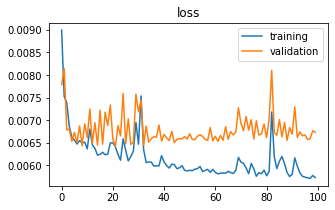

In [ ]:
epochs = 100
validation_split = 0.1

history = model.fit(X_train, Y_train, batch_size=128,
          epochs=epochs, 
          validation_split=validation_split)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

In [ ]:
# A = np.array([])
# OFFSET = 100
# LEN = 40
# for i in range(0,LEN):
#     A = np.append(A,model.predict(X_train[OFFSET+i].reshape(1,5,17)))

In [ ]:
X_train[0].reshape(1,4,17)

array([[[0.05034993, 0.27276439, 0.98729924, 0.50984203, 0.03917711,
         0.08894901, 0.26205375, 0.580655  , 0.11995784, 0.58551673,
         0.38306629, 0.76595918, 0.17376478, 0.20447118, 0.76616353,
         0.42030506, 0.07838522],
        [0.23785497, 0.53025431, 0.98723572, 0.22725861, 0.46130182,
         0.15204075, 0.2792846 , 0.46441378, 0.07541523, 0.92962932,
         0.57494168, 0.70957814, 0.23582264, 0.2188143 , 0.87436413,
         0.5104899 , 0.00426546],
        [0.13467945, 0.5152548 , 0.57667461, 0.12228095, 0.54091738,
         0.35771934, 0.54488903, 0.433683  , 0.31940881, 0.79281209,
         0.34146111, 0.83765468, 0.32191332, 0.26620453, 0.86900757,
         0.27681139, 0.        ],
        [0.5649698 , 0.44453869, 0.62631251, 0.39504283, 0.71598856,
         0.73929561, 0.11026317, 0.55326939, 0.70985502, 0.40325431,
         0.54865069, 0.84782282, 0.63172277, 0.54143801, 0.29252665,
         0.45063591, 0.18460072]]])

In [ ]:
A = np.array([])
OFFSET = 100
LEN = 40
for i in range(0,LEN):
    A = np.append(A,model.predict(X_train[OFFSET+i].reshape(1,4,17)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
A.shape

(40,)

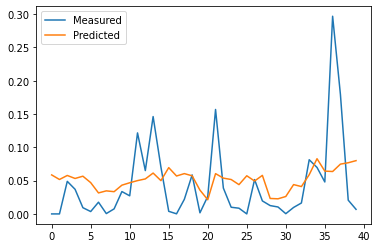

In [ ]:
plt.plot(Y_train[OFFSET:OFFSET+LEN],label="Measured")
plt.plot(A,label="Predicted")
plt.legend()

In [ ]:
#y_new_inverse = scaled2.inverse_transform(A)

In [ ]:
A1=A.reshape(-1,1)
#_scaled = scaler.fit_transform(A1)

In [ ]:
y_new_inverse = scaler2.inverse_transform(A1)

In [ ]:
y_new_inverse.reshape(-1,)

array([1645.86172204, 1452.70414543, 1622.42848694, 1495.70917498,
       1591.75223668, 1320.18748957,  886.0137799 ,  972.6328072 ,
        938.39645923, 1213.15724241, 1314.69243097, 1405.37026911,
       1476.68310651, 1723.87415214, 1404.61261883, 1953.3153868 ,
       1600.22617178, 1700.63252844, 1608.3148947 , 1003.9167692 ,
        598.56183109, 1699.57699052, 1510.52921642, 1451.84901417,
       1235.96161521, 1609.55167815, 1388.24240985, 1626.38290623,
        652.19207856,  637.34654129,  735.20687471, 1237.56403088,
       1154.12638086, 1654.44235222, 2330.04368827, 1806.30024063,
       1789.37749979, 2101.12755258, 2158.93513772, 2247.9443862 ])

Text(0.5, 1.0, 'Forecasted value for 40 observations')

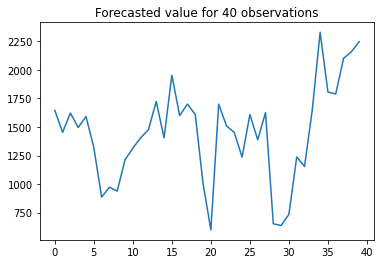

In [ ]:
plt.plot(y_new_inverse)
plt.title("Forecasted value for 40 observations")

In [ ]:
external_news_validation


,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined
1480,2014-06-26,"U.S. Scientist Offers $10,000 to Anyone Who Ca...",Iran Tries To Save Asiatic Cheetah From Extinc...,Fake engineer made Berlin Airport fire system:...,Explosion rips through mall in Nigerian capita...,Conservative Canadian Government surprises whe...,North Korean restaurants springing up around A...,The polio virus has been detected in sewage in...,Iraq confirms and welcomes Syrian air strikes ...,ALERT: North Korea fires three projectiles int...,...,Kerry demands Russia action on Ukraine 'in hou...,"In a U.S. Court, Iraqis Accuse Blackwater of K...",World Health Organisation urges 'drastic actio...,Iraqi jihadists seize ancient Exorcist temple ...,Astronomers Detect Mysterious Signal 240 Milli...,"For first time, Israel compensating Palestinia...",Hamas arrests terror cell responsible for rock...,Chinese government funds have been misused to ...,Tackling climate change would grow global econ...,"U.S. Scientist Offers $10,000 to Anyone Who Ca..."
1481,2014-06-27,German government cancels Verizon contract in ...,Australian woman found dead wearing headphones...,"Mexican military chopper crosses the border, s...",Put Ultraviolet Dye In London Water Cannons To...,"Ukraine, Georgia and Moldova have signed partn...","Russell Brand: Fanatical, terrorist, propagand...","Costa Rican President Luis Guillermo Solis, a ...","Obama Seeks $500M to Train, Equip Syrian Rebels",Britain bans controversial Saudi cleric al-Ari...,...,Iranian students prevented from studying scien...,"It took awhile, but Mubarak Bala, the 29 year-...","UN: 110,000 fled Ukraine for Russia this year",U.N. Experts: Detroits Mass Water Shut-Off Vio...,"Israel Could Get Dragged into ISIS's War, Obam...",Pablo Escobars hippos: A growing problem,WHO reduces Ebola death toll by changing the w...,Indian Intelligence Bureau redflags entry of S...,The fight against Boko Haram sees an unusual f...,German government cancels Verizon contract in ...
1482,2014-06-30,Blackwaters top manager issued a threat: that ...,Indian mars mission is cheaper than the movie ...,Jehovah's Witnesses destroyed documents showin...,Facebook is facing criticism after it emerged ...,Peru now has a licence to kill environmental p...,New Zealand: A church which advertised that a ...,ISIS declares Islamic caliphate from Aleppo to...,Two French Jews were sent to prison for placin...,The Ugly Truth About Your Shrimp Cocktail - Re...,...,Tens of thousands turn out for Istanbul Gay Pr...,Vaccination for Heroin Addiction and Overdose ...,Hong Kong prepares for mass protest against Be...,Ukrainians crowdfund to raise cash for 'people...,A diplomat has evaded sexual assault charges i...,Bulgaria's President Plevneliev to dissolve pa...,Poroshenko: Ukraines only state language to be...,World Bank: tackle global warming and add $2 t...,Ultra low interest rates and the failure of po...,Blackwaters top manager issued a threat: that ...
1483,2014-07-01,Ukraine president ends ceasefire - 'We will at...,"ISIS Vows To Destroy Meccas Kaaba, Kill Those ...",Guaranteed $20K income for all Canadians endor...,Japan authorized a reinterpretation of war-ren...,Bodies of Three Missing Israeli Teens Found Ne...,Remaining Snowden docs will be released to ave...,"MIT and CERNs secure webmail plan, Proton Mail...",The United Nations has voted to legislate agai...,The European Court of Human Rights has upheld ...,...,MH370: New evidence of tampering with cockpit ...,Tens of thousands of Hong Kong residents march...,Former French President Nicolas Sarkozy is bei...,"Massive dams in Borneo to flood over 2,000 squ...",Unknown persons erect KKK flag in east Belfast...,"Snowden applies to extend asylum in Russia, re...",Barrier Reef Dredge Spoil Could Travel Further...,Ex-French President Sarkozy Detained,Kuwait finance firm suggests trading oil in bi...,Ukraine president ends ceasefire - 'We will at..

In [ ]:
from pandas.core.groupby import groupby
vect_gp=['Segment','Market']

In [ ]:
 object2=data_features.groupby(vect_gp)

In [ ]:
data_features.groupby(vect_gp)['Order Date'].count().reset_index().rename(columns={'Order Date':'Series_Length'})

,Segment,Market,Series_Length
0,Consumer,APAC,5699
1,Consumer,Africa,2381
2,Consumer,Canada,202
3,Consumer,EMEA,2538
4,Consumer,EU,5186
5,Consumer,LATAM,5321
6,Consumer,US,5191
7,Corporate,APAC,3283
8,Corporate,Africa,1312
9,Corporate,Canada,110


In [ ]:
Market_List=data_features['Market'].unique()
Category_List=data_features['Segment'].unique()

In [ ]:
Market_List
Category_List

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean


SimpleImputer()

In [ ]:
df=data_features


In [ ]:
df=object2.get_group(('Consumer','Africa'))
df=df.loc[:,['Order Date','Sales']]
df.set_index('Order Date')


,Sales
Order Date,
2011-01-01,408.300
2011-01-06,21.180
2011-01-06,10.860
2011-01-08,922.860
2011-01-08,99.480
...,...
2013-12-31,81.780
2013-12-31,17.880
2014-12-31,126.720


In [ ]:
df2=df.set_index('Order Date')

In [ ]:
df_m=df2.resample('d').sum()




In [ ]:
df_m

,Sales
Order Date,
2011-01-01,408.300
2011-01-02,0.000
2011-01-03,0.000
2011-01-04,0.000
2011-01-05,0.000
...,...
2014-12-27,14.970
2014-12-28,140.580
2014-12-29,714.780


In [ ]:
df_mod_africa_consumer = df_m.reset_index()

In [ ]:
df_mod_africa_consumer


,Order Date,Sales
0,2011-01-01,408.300
1,2011-01-02,0.000
2,2011-01-03,0.000
3,2011-01-04,0.000
4,2011-01-05,0.000
...,...,...
1456,2014-12-27,14.970
1457,2014-12-28,140.580
1458,2014-12-29,714.780
1459,2014-12-30,1603.128


In [ ]:
sales=df_m['Sales']
df_m['Sales']=sales.replace(0, np.nan)

In [ ]:
df_m

,Sales
Order Date,
2011-01-01,408.300
2011-01-02,NaN
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
...,...
2014-12-27,14.970
2014-12-28,140.580
2014-12-29,714.780


In [ ]:
imputed=np.where((np.isnan(df_m['Sales'])),df_m['Sales'].mean(skipna=True),df_m['Sales'])

In [ ]:
imputed

array([ 408.3      ,  597.6964866,  597.6964866, ...,  714.78     ,
       1603.128    ,  153.633    ])

In [ ]:
df_m['Imputed_Sales']=imputed.tolist()

In [ ]:
df_m

,Sales,Imputed_Sales
Order Date,,
2011-01-01,408.300,408.300000
2011-01-02,NaN,597.696487
2011-01-03,NaN,597.696487
2011-01-04,NaN,597.696487
2011-01-05,NaN,597.696487
...,...,...
2014-12-27,14.970,14.970000
2014-12-28,140.580,140.580000
2014-12-29,714.780,714.780000


In [ ]:
del df_m['Sales']

In [ ]:
df_consumer_africa=df_m

In [ ]:
# imp_mean.fit(df_m)
# df3=imp_mean.transform(df_m)
# df3

In [ ]:
# df3.reshape(-1,)

In [ ]:
# Market_List
# Category_List

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [ ]:
# df=object2.get_group((Category_List[0],Market_List[0]))
# df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
# df=df.loc[:,['Order Date','Sales']]
# df.set_index('Order Date')



In [ ]:
# for i in  range(len(Market_List)):
#      for j  in range(len(Category_List)):
#          df=object2.get_group((Category_List[j],Market_List[i]))
#          df=df.loc[:,['Order Date','Sales']]
#          df.set_index('Order Date')
#          df.resample('d').mean()
#          imputed=np.where((np.isnan(df['Sales'])),df['Sales'].mean(skipna=True),df['Sales'])
#          df.set_index('Order Date')
#          df['Imputed_Sales']=imputed.tolist()
#          del df['Sales']

         

In [ ]:
data_ext_train=pd.concat([data_features,p],axis=1)

In [ ]:
data_ext_train_africa=pd.concat([df_mod_africa_consumer,p],axis=1)

In [ ]:
data_ext_train_africa

,Order Date,Sales,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2011-01-01,408.300,-0.024341,0.000458,0.029291,0.017140,-0.026979,-0.015526,-0.010141,0.029113,-0.010924,-0.002311,0.009752,0.018709,0.000987,-0.000858,-0.006966,0.019630
1,2011-01-02,0.000,0.001347,0.030260,0.029282,-0.009680,0.018878,-0.004484,-0.008754,0.017036,-0.018420,0.027106,0.030274,0.013792,0.012474,0.001273,0.010711,0.030516
2,2011-01-03,0.000,-0.012788,0.028524,-0.027810,-0.019644,0.027527,0.031512,0.012627,0.013843,0.022641,0.015410,0.005302,0.024961,0.028408,0.008313,0.009836,0.002309
3,2011-01-04,0.000,0.046160,0.020339,-0.020908,0.006244,0.046546,0.098293,-0.022360,0.026268,0.088348,-0.017892,0.027462,0.025848,0.085749,0.049202,-0.084346,0.023291
4,2011-01-05,0.000,0.023307,0.020721,0.021790,-0.002730,0.008263,0.016840,0.026755,0.028741,-0.005513,-0.021394,-0.017349,-0.018205,0.026147,0.023113,-0.031176,-0.025327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2014-12-27,14.970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,2014-12-28,140.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,2014-12-29,714.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,2014-12-30,1603.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_ext_train.tail(3)
data_ext_train2=data_ext_train.rename(columns={0:'VECT-1',1:'VECT-1',2:'VECT-2',3:'VECT-3',4:'VECT-4',5:'VECT-5',6:'VECT-6',7:'VECT-7',8:'VECT-8',9:'VECT-9',10:'VECT-10',11:'VECT-11',12:'VECT-12',13:'VECT-13',14:'VECT-15'})

In [ ]:
column_names=[['Order Date','year','month','day','Market','Category','Sales','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']]

In [ ]:
vector=['Market','Category','Sales','Order Date','year','month','day','VECT-1','VECT-2','VECT-3','VECT-4','VECT-5','VECT-6','VECT-7','VECT-8','VECT-9','VECT-10','VECT-11','VECT-12','VECT-13','VECT-15']

In [ ]:
data_ext_train3=data_ext_train2[vector]

In [ ]:
# Develop Neural Network Model 

In [ ]:
data_ext_train3[data_ext_train3['Market']=='US']

,Market,Category,Sales,Order Date,year,month,day,VECT-1,VECT-1,VECT-2,...,VECT-5,VECT-6,VECT-7,VECT-8,VECT-9,VECT-10,VECT-11,VECT-12,VECT-13,VECT-15
7,US,Furniture,290.666,2011-01-02,2011,1,2,0.030516,0.029752,-0.053755,...,0.086660,-0.023540,0.065249,0.104791,-0.002574,0.058664,-0.020540,0.067931,0.038487,-0.071986
27,US,Furniture,634.116,2011-01-03,2011,1,3,0.011180,0.005709,0.017479,...,-0.027136,-0.010683,0.004939,0.006383,0.028892,0.005007,-0.026738,0.026271,-0.001885,-0.001692
32,US,Furniture,457.568,2011-01-03,2011,1,3,-0.007865,-0.031079,0.022159,...,-0.025929,-0.002175,-0.004353,-0.019720,0.010054,-0.009811,0.004215,0.026890,0.002903,0.001468
34,US,Furniture,376.509,2011-01-03,2011,1,3,-0.004074,-0.017511,0.023026,...,0.020060,0.003027,-0.019798,0.012795,-0.004268,0.007637,-0.011826,0.009254,0.000898,-0.017673
36,US,Furniture,362.250,2011-01-03,2011,1,3,0.025119,-0.008571,-0.007488,...,0.044334,0.007742,0.006030,0.045547,0.023906,0.022343,-0.005089,0.065078,0.038692,-0.026507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51257,US,Office Supplies,209.300,2014-12-31,2014,12,31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51260,US,Office Supplies,52.776,2014-12-31,2014,12,31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51281,US,Office Supplies,20.720,2014-12-31,2014,12,31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51285,US,Office Supplies,13.904,2014-12-31,2014,12,31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preparing Validation Data/Inference Data for All Products in US 

In [ ]:
validation_data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,day
16589,27884,ID-2014-72110,2014-07-01,11/1/2014,Standard Class,DP-13165,David Philippe,Consumer,Albury,New South Wales,...,"Breville Microwave, Silver",3810.996,14,0.1,-42.504,96.85,Medium,2014,7,1


In [ ]:
validation_short=validation_data[validation_data['Market']=='US'][['Sales','Order Date']]

In [ ]:
validation_short2=validation_short.set_index(['Order Date']).resample('d').sum()

In [ ]:
validation_short2.reset_index(inplace=True)

In [ ]:
validation_short2

,Order Date,Sales
0,2014-06-26,1508.3520
1,2014-06-27,4224.1360
2,2014-06-28,1644.9060
3,2014-06-29,0.0000
4,2014-06-30,4521.9912
...,...,...
184,2014-12-27,814.5940
185,2014-12-28,177.6360
186,2014-12-29,1657.3508
187,2014-12-30,2915.5340


In [ ]:
external_news_validation.head(1)
external_news_validation2=external_news_validation.rename(columns={'Date':'Order Date'})

In [ ]:
clean_valid_corpus=cleantext(external_news_validation2['combined'])

In [ ]:
s,u,v=doc2vec(clean_valid_corpus)

In [ ]:
s.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.022853,0.016315,0.030472,0.030494,0.029899,0.012386,0.022069,0.024428,0.027325,0.00333,0.030406,-0.018534,-0.004554,-0.00423,0.002246,-0.016142


In [ ]:
s.shape

(131, 16)

In [ ]:
external_news_validation2.head(1)

,Order Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined
1480,2014-06-26,"U.S. Scientist Offers $10,000 to Anyone Who Ca...",Iran Tries To Save Asiatic Cheetah From Extinc...,Fake engineer made Berlin Airport fire system:...,Explosion rips through mall in Nigerian capita...,Conservative Canadian Government surprises whe...,North Korean restaurants springing up around A...,The polio virus has been detected in sewage in...,Iraq confirms and welcomes Syrian air strikes ...,ALERT: North Korea fires three projectiles int...,...,Kerry demands Russia action on Ukraine 'in hou...,"In a U.S. Court, Iraqis Accuse Blackwater of K...",World Health Organisation urges 'drastic actio...,Iraqi jihadists seize ancient Exorcist temple ...,Astronomers Detect Mysterious Signal 240 Milli...,"For first time, Israel compensating Palestinia...",Hamas arrests terror cell responsible for rock...,Chinese government funds have been misused to ...,Tackling climate change would grow global econ...,"U.S. Scientist Offers $10,000 to Anyone Who Ca..."


In [ ]:
external_news_validation2['Order Date']=pd.to_datetime(external_news_validation2['Order Date'])


In [ ]:
# reate Order Date Here 

In [ ]:
# Create Sales here

In [ ]:
validation_set=validation_short2.merge(external_news_validation2,on='Order Date',how='left')

In [ ]:
validation_set['combined']=validation_set['combined'].fillna('No News')

In [ ]:
text=validation_set['combined']

In [ ]:
def doc2vec_gen(text):
   new=cleantext(text)#cleaning text
   f,g,h=doc2vec(new)
   return f


In [ ]:
valid_vector=doc2vec_gen(text)

In [ ]:
valid_vector['Sales']=validation_short2['Sales']


In [ ]:
valid_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,0.022617,0.016200,0.030645,0.030412,0.029751,0.012037,0.022026,0.024302,0.027065,0.003374,0.030330,-0.018527,-0.004867,-0.004408,0.002488,-0.016288,1508.3520
1,0.014344,0.014898,-0.000154,-0.002408,0.001241,0.018264,-0.030499,0.040451,0.040388,0.013375,0.030766,0.004380,0.052238,0.032042,-0.028694,0.002880,4224.1360
2,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,1644.9060
3,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,0.0000
4,0.005562,-0.003405,-0.012682,-0.013308,0.004550,0.002478,0.030848,0.026163,-0.029780,0.001136,0.022568,-0.018937,-0.008538,-0.005183,0.005850,-0.007966,4521.9912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,814.5940
185,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,177.6360
186,0.028025,0.015715,0.030733,-0.027007,0.015219,-0.013514,-0.015434,-0.027922,-0.001793,0.027196,0.023285,-0.007952,-0.020893,-0.015868,-0.029213,-0.017915,1657.3508
187,-0.013920,-0.029884,0.025594,0.000396,-0.027813,0.021146,-0.004497,0.005082,-0.020322,-0.006395,-0.018026,0.017316,0.007562,-0.007457,0.020096,-0.004443,2915.5340


In [ ]:
mean1=valid_vector['Sales'].mean()

In [ ]:
valid_vector['Sales']=valid_vector['Sales'].replace(0.00,mean1)#replacing 0 values 

In [ ]:
valid_vector.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,0.022617,0.016200,0.030645,0.030412,0.029751,0.012037,0.022026,0.024302,0.027065,0.003374,0.030330,-0.018527,-0.004867,-0.004408,0.002488,-0.016288,1508.352000
1,0.014344,0.014898,-0.000154,-0.002408,0.001241,0.018264,-0.030499,0.040451,0.040388,0.013375,0.030766,0.004380,0.052238,0.032042,-0.028694,0.002880,4224.136000
2,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,1644.906000
3,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,2244.414278
4,0.005562,-0.003405,-0.012682,-0.013308,0.004550,0.002478,0.030848,0.026163,-0.029780,0.001136,0.022568,-0.018937,-0.008538,-0.005183,0.005850,-0.007966,4521.991200
5,0.025226,0.023587,-0.013217,0.005224,-0.018715,0.013781,-0.014482,0.018117,-0.019386,-0.004400,0.009604,-0.000843,-0.022185,-0.012766,-0.017827,0.001016,33.740000
6,0.023361,-0.013043,-0.003269,0.011601,-0.030455,0.004027,0.024410,0.019132,-0.029203,0.010869,0.021635,0.017042,0.007957,-0.004956,-0.009663,0.002947,904.354000
7,-0.027647,-0.020883,-0.013646,-0.026414,0.011936,0.023383,-0.010841,-0.018426,-0.012061,0.003256,-0.007070,-0.019075,-0.000908,-0.021768,-0.017974,-0.028840,778.236000
8,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,114.420000
9,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,3183.369800


In [ ]:
valid_vector2=valid_vector.iloc[:-9,:]

In [ ]:
valid_vector2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,0.022617,0.016200,0.030645,0.030412,0.029751,0.012037,0.022026,0.024302,0.027065,0.003374,0.030330,-0.018527,-0.004867,-0.004408,0.002488,-0.016288,1508.352000
1,0.014344,0.014898,-0.000154,-0.002408,0.001241,0.018264,-0.030499,0.040451,0.040388,0.013375,0.030766,0.004380,0.052238,0.032042,-0.028694,0.002880,4224.136000
2,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,1644.906000
3,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,2244.414278
4,0.005562,-0.003405,-0.012682,-0.013308,0.004550,0.002478,0.030848,0.026163,-0.029780,0.001136,0.022568,-0.018937,-0.008538,-0.005183,0.005850,-0.007966,4521.991200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.038200,0.027265,-0.057587,0.025216,0.064010,0.066377,-0.007522,0.029665,0.083838,-0.033003,0.021736,0.003870,0.068245,0.057147,-0.054922,0.029456,2027.758000
176,0.025901,-0.030574,0.022536,-0.019143,-0.021714,0.002026,-0.023498,0.028439,0.023287,-0.000236,0.000671,-0.000472,-0.020361,-0.020886,-0.024822,0.019428,3645.911000
177,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,1895.926000
178,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,377.736000


In [ ]:
def scaling(X):
  value_1= X.values#np.array
  scalar=MinMaxScaler(feature_range=(0,1))
  scaled=scaler.fit_transform(value_1)
  return scaled

In [ ]:
valid_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Sales
0,0.022617,0.016200,0.030645,0.030412,0.029751,0.012037,0.022026,0.024302,0.027065,0.003374,0.030330,-0.018527,-0.004867,-0.004408,0.002488,-0.016288,1508.352000
1,0.014344,0.014898,-0.000154,-0.002408,0.001241,0.018264,-0.030499,0.040451,0.040388,0.013375,0.030766,0.004380,0.052238,0.032042,-0.028694,0.002880,4224.136000
2,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,1644.906000
3,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,2244.414278
4,0.005562,-0.003405,-0.012682,-0.013308,0.004550,0.002478,0.030848,0.026163,-0.029780,0.001136,0.022568,-0.018937,-0.008538,-0.005183,0.005850,-0.007966,4521.991200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,814.594000
185,0.018559,-0.024616,-0.004928,-0.027056,0.006509,-0.015693,0.006573,-0.029109,-0.017108,-0.014367,-0.016923,-0.019268,-0.016130,0.012567,-0.009142,-0.011082,177.636000
186,0.028025,0.015715,0.030733,-0.027007,0.015219,-0.013514,-0.015434,-0.027922,-0.001793,0.027196,0.023285,-0.007952,-0.020893,-0.015868,-0.029213,-0.017915,1657.350800
187,-0.013920,-0.029884,0.025594,0.000396,-0.027813,0.021146,-0.004497,0.005082,-0.020322,-0.006395,-0.018026,0.017316,0.007562,-0.007457,0.020096,-0.004443,2915.534000


In [ ]:
valid_vector2=valid_vector.iloc[:-9,]# to create a 3 dimensional matrix 
valid_vector2.shape

(180, 17)

In [ ]:
y_actual=valid_vector2.iloc[4:,-1]
y_actual

4      4521.9912
5        33.7400
6       904.3540
7       778.2360
8       114.4200
         ...    
175    2027.7580
176    3645.9110
177    1895.9260
178     377.7360
179    2140.9400
Name: Sales, Length: 176, dtype: float64

In [ ]:
valid_vector_uni=valid_vector2.iloc[:,16]

In [ ]:
valid_vector_uni

0      1508.352000
1      4224.136000
2      1644.906000
3      2244.414278
4      4521.991200
          ...     
175    2027.758000
176    3645.911000
177    1895.926000
178     377.736000
179    2140.940000
Name: Sales, Length: 180, dtype: float64

In [ ]:
#y_ACT.shape

In [ ]:
#actual=y_ACT[:,0]

In [ ]:
#print(len(actual))

In [ ]:
valid_vector2.shape

(180, 17)

In [ ]:
def transform(X):
   val2=X.loc['Sales'].values
   val2.reshape(-1,1)
   scalar2=MinMaxScaler(feature_range=(0,1))
   scaled2=scaler.fit(transform(val2))
   y_train=scaler2.inverse_transform(val2)
   return y_train

In [ ]:
scaled_valid=scaling(valid_vector2)

In [ ]:
scaled_valid.shape

(180, 17)

NameError: ignored

In [ ]:
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
X_test=scaled_valid[0:-SEQ_LEN-1,:].reshape(-1,1,17)

In [ ]:

for i in range(1,SEQ_LEN):
    X_test = np.append(X_test, scaled_valid[i:-SEQ_LEN+i-1,:].reshape(-1,1,17), axis=1)

In [ ]:
X_test.shape

(175, 4, 17)

In [ ]:
yhat=model.predict(X_test)

In [ ]:
#valid_3d=scaled_valid.reshape(1,4,17)

In [ ]:
actual=valid_vector2['Sales'].values


In [ ]:
print(len(actual))

180


In [ ]:
values2=actual.reshape(-1,1)

In [ ]:
values2

array([[1.50835200e+03],
       [4.22413600e+03],
       [1.64490600e+03],
       [2.24441428e+03],
       [4.52199120e+03],
       [3.37400000e+01],
       [9.04354000e+02],
       [7.78236000e+02],
       [1.14420000e+02],
       [3.18336980e+03],
       [3.13500000e+01],
       [3.80378000e+02],
       [1.42402600e+03],
       [2.24441428e+03],
       [1.49965200e+03],
       [4.28875000e+03],
       [1.06800000e+01],
       [3.81600000e+00],
       [5.04542000e+02],
       [3.59893400e+03],
       [2.13222900e+03],
       [3.16636000e+02],
       [2.19187300e+03],
       [2.10679400e+03],
       [2.24441428e+03],
       [2.28320800e+03],
       [3.68594400e+03],
       [5.56314000e+02],
       [8.98188000e+02],
       [2.39996000e+03],
       [7.98742000e+02],
       [2.01230200e+03],
       [1.14268000e+03],
       [1.17056400e+03],
       [1.39129400e+03],
       [5.23376000e+02],
       [3.39559000e+03],
       [2.24441428e+03],
       [1.66590000e+02],
       [1.97129050e+03],


In [ ]:
scaler2=MinMaxScaler(feature_range=(0,1))
scaled2=scaler2.fit_transform(values2)
#inverse_number=scaled2.inverse_transform(yhat)


In [ ]:
yhat_unscaled=scaler2.inverse_transform(yhat)

In [ ]:
yhat_unscaled

array([[1107.839  ],
       [1250.4471 ],
       [ 863.9075 ],
       [ 961.96533],
       [1338.0143 ],
       [ 853.66174],
       [ 859.8684 ],
       [ 485.34448],
       [ 377.33978],
       [ 445.72757],
       [ 577.41974],
       [ 647.1608 ],
       [1258.3226 ],
       [1155.8228 ],
       [ 977.0435 ],
       [ 771.04364],
       [ 764.75867],
       [1200.4645 ],
       [1209.9    ],
       [1028.7065 ],
       [ 988.4475 ],
       [1026.944  ],
       [ 945.0848 ],
       [ 825.0592 ],
       [ 999.8675 ],
       [1261.9893 ],
       [1555.0297 ],
       [1119.657  ],
       [1013.9987 ],
       [ 269.2663 ],
       [ 348.31442],
       [ 762.81415],
       [ 572.79535],
       [ 992.2617 ],
       [1104.389  ],
       [ 611.16   ],
       [ 527.2481 ],
       [ 933.5462 ],
       [1129.8474 ],
       [1291.7384 ],
       [1258.145  ],
       [1389.6775 ],
       [1327.6411 ],
       [1220.6648 ],
       [ 833.171  ],
       [1474.9319 ],
       [1452.7163 ],
       [1267.

In [ ]:
def MAPE(Y_Predicted,Y_actual):
     mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
     return mape

def test_evaluation(predictions,valid):
   df=pd.DataFrame(predictions)
   yhat=df.values.reshape(-1,)
   mape=MAPE(yhat,valid)
   return mape

In [ ]:
yhat_array_unscaled=yhat_unscaled.reshape(-1,)

In [ ]:
yhat_array_unscaled

array([1107.839  , 1250.4471 ,  863.9075 ,  961.96533, 1338.0143 ,
        853.66174,  859.8684 ,  485.34448,  377.33978,  445.72757,
        577.41974,  647.1608 , 1258.3226 , 1155.8228 ,  977.0435 ,
        771.04364,  764.75867, 1200.4645 , 1209.9    , 1028.7065 ,
        988.4475 , 1026.944  ,  945.0848 ,  825.0592 ,  999.8675 ,
       1261.9893 , 1555.0297 , 1119.657  , 1013.9987 ,  269.2663 ,
        348.31442,  762.81415,  572.79535,  992.2617 , 1104.389  ,
        611.16   ,  527.2481 ,  933.5462 , 1129.8474 , 1291.7384 ,
       1258.145  , 1389.6775 , 1327.6411 , 1220.6648 ,  833.171  ,
       1474.9319 , 1452.7163 , 1267.1683 , 1279.886  ,  960.3336 ,
       1276.5159 , 1400.765  , 1677.8501 , 2042.5717 , 2124.2522 ,
       1355.1969 , 1442.7975 , 1082.1064 ,  225.3959 ,  563.7358 ,
        979.7941 , 1151.4218 , 1192.9713 , 1384.5361 ,  850.7755 ,
        447.9525 ,  399.26468, 1159.328  , 1456.6412 , 1527.303  ,
       1444.7692 ,  975.9609 ,  676.3401 ,  786.4795 ,  867.56

In [ ]:
print(len(yhat_array_unscaled))

175


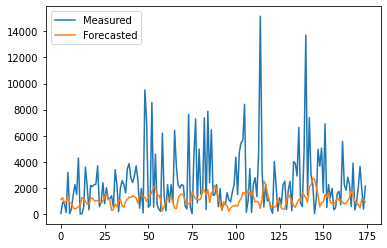

In [ ]:
plt.plot(actual[5:],label="Measured")
plt.plot(yhat_array_unscaled,label='Forecasted')
plt.legend()

In [ ]:
mape_with_news_daily=MAPE(y_hat_valid_unscaled,actual[5:])

In [ ]:
#yhat_array
#valid=valid_vector.iloc[:-1,-1]

In [ ]:
#valid.shape

In [ ]:
#Since we are using  4 sequential data to predict 5 , we are only predictiing 40 values



0      1508.352000
1      4224.136000
2      1644.906000
3      2244.414278
4      4521.991200
          ...     
175    2027.758000
176    3645.911000
177    1895.926000
178     377.736000
179    2140.940000
Name: Sales, Length: 180, dtype: float64

In [ ]:
valid_vector2


0      1508.352000
1      4224.136000
2      1644.906000
3      2244.414278
4      4521.991200
          ...     
175    2027.758000
176    3645.911000
177    1895.926000
178     377.736000
179    2140.940000
Name: Sales, Length: 180, dtype: float64

In [ ]:
print(len(yhat_array_unscaled))

175


In [ ]:
test_evaluation(yhat_array_unscaled,actual[5:])

467.6889909056557

array([1.50835200e+03, 4.22413600e+03, 1.64490600e+03, 2.24441428e+03,
       4.52199120e+03, 3.37400000e+01, 9.04354000e+02, 7.78236000e+02,
       1.14420000e+02, 3.18336980e+03, 3.13500000e+01, 3.80378000e+02,
       1.42402600e+03, 2.24441428e+03, 1.49965200e+03, 4.28875000e+03,
       1.06800000e+01, 3.81600000e+00, 5.04542000e+02, 3.59893400e+03,
       2.13222900e+03, 3.16636000e+02, 2.19187300e+03, 2.10679400e+03,
       2.24441428e+03, 2.28320800e+03, 3.68594400e+03, 5.56314000e+02,
       8.98188000e+02, 2.39996000e+03, 7.98742000e+02, 2.01230200e+03,
       1.14268000e+03, 1.17056400e+03, 1.39129400e+03, 5.23376000e+02,
       3.39559000e+03, 2.24441428e+03, 1.66590000e+02, 1.97129050e+03,
       2.54946800e+03, 2.24441428e+03, 1.62025000e+03, 3.47962400e+03,
       3.84856500e+03, 2.74921000e+03, 2.41337800e+03, 2.91651400e+03,
       3.69308400e+03, 2.64316400e+03, 4.40736000e+02, 1.94987200e+03,
       8.05640000e+01, 9.51728800e+03, 7.07848400e+03, 5.12446000e+02,
      

In [ ]:
def rnn_training_model2(df,df_valid,k):
    x_train=df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(x_train)
    SEQ_LEN = k
    DATA_LEN = scaled.shape[0]# Length 
    X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,1)#preparing training data from 0:-6
    for i in range(1,SEQ_LEN):
         X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)## Each X train has been divided into 4 feature vectors 
    Y_train = scaled[SEQ_LEN:-1,-1]# We cannot predict 1st 4 Observations as they are used a features so have to start from 5 
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam',metrics = ['mae'])
    epochs = 100
    validation_split = 0.1
    history = model.fit(X_train, Y_train, batch_size=128,epochs=epochs,validation_split=validation_split)
    x_test=df_valid.values
    x_test2=x_test.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_valid = scaler.fit_transform(x_test2)
    X_test=scaled_valid[0:-SEQ_LEN-1,:].reshape(-1,1,1)
    for i in range(1,SEQ_LEN):
        X_test = np.append(X_test, scaled_valid[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)
    y_hat_valid=model.predict(X_test)
    y_hat_valid_unscaled=scaler.inverse_transform(y_hat_valid)
    yactual=x_test[SEQ_LEN:-1,]
    mape1=MAPE(y_hat_valid,yactual)
    return mape1

In [ ]:
 y=rnn_training_model(training_data_us_all,valid_vector_uni,3)

Train on 1140 samples, validate on 127 samples
Epoch 1/100
 768/1140 [===================>..........] - ETA: 0s - loss: 0.0069 - mean_absolute_error: 0.0458

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1140/1140 [==============================] - 1s 959us/sample - loss: 0.0064 - mean_absolute_error: 0.0470 - val_loss: 0.0065 - val_mean_absolute_error: 0.0527
Epoch 2/100
1140/1140 [==============================] - 0s 55us/sample - loss: 0.0059 - mean_absolute_error: 0.0547 - val_loss: 0.0065 - val_mean_absolute_error: 0.0537
Epoch 3/100
1140/1140 [==============================] - 0s 61us/sample - loss: 0.0058 - mean_absolute_error: 0.0516 - val_loss: 0.0067 - val_mean_absolute_error: 0.0495
Epoch 4/100
1140/1140 [==============================] - 0s 53us/sample - loss: 0.0058 - mean_absolute_error: 0.0482 - val_loss: 0.0067 - val_mean_absolute_error: 0.0492
Epoch 5/100
1140/1140 [==============================] - 0s 68us/sample - loss: 0.0058 - mean_absolute_error: 0.0496 - val_loss: 0.0066 - val_mean_absolute_error: 0.0513
Epoch 6/100
1140/1140 [==============================] - 0s 54us/sample - loss: 0.0058 - mean_absolute_error: 0.0514 - val_loss: 0.0066 - val_mean_absolute_error

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
 y2=rnn_training_model2(training_data_us_all,valid_vector_uni,3)

Train on 1140 samples, validate on 127 samples
Epoch 1/100
1140/1140 [==============================] - ETA: 0s - loss: 0.0066 - mean_absolute_error: 0.0485

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1140/1140 [==============================] - 3s 3ms/sample - loss: 0.0066 - mean_absolute_error: 0.0485 - val_loss: 0.0066 - val_mean_absolute_error: 0.0562
Epoch 2/100
1140/1140 [==============================] - 0s 240us/sample - loss: 0.0060 - mean_absolute_error: 0.0552 - val_loss: 0.0066 - val_mean_absolute_error: 0.0516
Epoch 3/100
1140/1140 [==============================] - 0s 226us/sample - loss: 0.0058 - mean_absolute_error: 0.0489 - val_loss: 0.0068 - val_mean_absolute_error: 0.0488
Epoch 4/100
1140/1140 [==============================] - 0s 245us/sample - loss: 0.0058 - mean_absolute_error: 0.0490 - val_loss: 0.0066 - val_mean_absolute_error: 0.0513
Epoch 5/100
1140/1140 [==============================] - 0s 200us/sample - loss: 0.0058 - mean_absolute_error: 0.0514 - val_loss: 0.0066 - val_mean_absolute_error: 0.0512
Epoch 6/100
1140/1140 [==============================] - 0s 215us/sample - loss: 0.0058 - mean_absolute_error: 0.0497 - val_loss: 0.0067 - val_mean_absolute_er

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
y2

99.97129767047426

Text(0.5, 1.0, 'Impact of News on Forecasting')

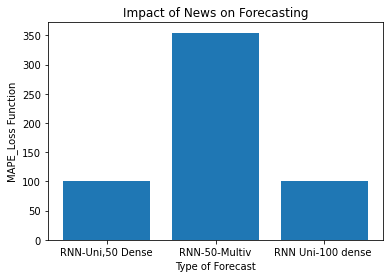

In [ ]:
List=['RNN-Uni,50 Dense','RNN-50-Multiv','RNN Uni-100 dense ']
mape_method=[y,mape_with_news_daily,y2]
plt.bar(List,mape_method)
plt.xlabel("Type of Forecast")
plt.ylabel("MAPE_Loss Function")
plt.title("Impact of News on Forecasting")

In [ ]:
x_train=training_data_us_all.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x_train)
SEQ_LEN = 5
DATA_LEN = scaled.shape[0]# Length 
X_train = scaled[0:-SEQ_LEN-1,:].reshape(-1,1,1)#preparing training data from 0:-6
for i in range(1,SEQ_LEN):
         X_train = np.append(X_train, scaled[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)## Each X train has been divided into 4 feature vectors 
Y_train = scaled[SEQ_LEN:-1,-1]# We cannot predict 1st 4 Observations as they are used a features so have to start from 5 
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics = ['mae'])
epochs =500
validation_split = 0.1
history = model.fit(X_train, Y_train, batch_size=128,epochs=epochs,validation_split=validation_split)

Train on 1138 samples, validate on 127 samples
Epoch 1/500
1138/1138 [==============================] - 1s 544us/sample - loss: 0.0066 - mean_absolute_error: 0.0501 - val_loss: 0.0068 - val_mean_absolute_error: 0.0570


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/500
1138/1138 [==============================] - 0s 96us/sample - loss: 0.0060 - mean_absolute_error: 0.0551 - val_loss: 0.0067 - val_mean_absolute_error: 0.0515
Epoch 3/500
1138/1138 [==============================] - 0s 78us/sample - loss: 0.0058 - mean_absolute_error: 0.0486 - val_loss: 0.0069 - val_mean_absolute_error: 0.0492
Epoch 4/500
1138/1138 [==============================] - 0s 70us/sample - loss: 0.0058 - mean_absolute_error: 0.0488 - val_loss: 0.0067 - val_mean_absolute_error: 0.0517
Epoch 5/500
1138/1138 [==============================] - 0s 80us/sample - loss: 0.0058 - mean_absolute_error: 0.0517 - val_loss: 0.0067 - val_mean_absolute_error: 0.0520
Epoch 6/500
1138/1138 [==============================] - 0s 74us/sample - loss: 0.0058 - mean_absolute_error: 0.0497 - val_loss: 0.0068 - val_mean_absolute_error: 0.0499
Epoch 7/500
1138/1138 [==============================] - 0s 72us/sample - loss: 0.0058 - mean_absolute_error: 0.0495 - val_loss: 0.0067 - val_mean_abs

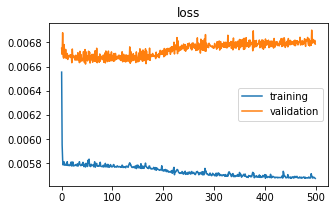

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

In [ ]:
x_test=valid_vector_uni.values
x_test2=x_test.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_valid = scaler.fit_transform(x_test2)
X_test=scaled_valid[0:-SEQ_LEN-1,:].reshape(-1,1,1)
for i in range(1,SEQ_LEN):
        X_test = np.append(X_test, scaled_valid[i:-SEQ_LEN+i-1,:].reshape(-1,1,1), axis=1)
y_hat_valid=model.predict(X_test)
y_hat_valid_unscaled=scaler.inverse_transform(y_hat_valid)
#yactual=x_test[SEQ_LEN:-1,-1]
#mape1=MAPE(y_hat_valid,yactual)

In [ ]:
y_actual=x_test[SEQ_LEN:-1]

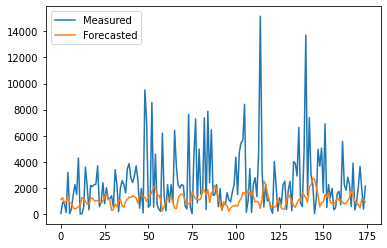

In [301]:
plt.plot(actual[5:],label="Measured")
plt.plot(yhat_array_unscaled,label='Forecasted')
plt.legend()